<center><h1> Corréction Série de Travaux Pratiques N° 6 - Machine Learning </h1></center>
<center><h2> Regression Logistique</h2></center>

---



# **Partie I : Regression Logistique**

Vous trouverez ci-joint un exemple d'utilisation d'algorithme de regréssion logistique avec les quatres étapes principales.

In [1]:
# Step 1: Import packages, functions
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=100)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [2]:
print('x:', x)
print('y:', y)
print('intercept:', model.intercept_)
print('coef:', model.coef_)
print('p_pred:', p_pred)
print('y_pred:', y_pred)
print('score_:', score_)
print('conf_m:', conf_m)
print('report:', report)

x: [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y: [0 1 0 0 1 1 1 1 1 1]
intercept: [-1.51632619]
coef: [[0.703457]]
p_pred: [[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]
y_pred: [0 0 0 1 1 1 1 1 1 1]
score_: 0.8
conf_m: [[2 1]
 [1 6]]
report:               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



# **Partie II : Classification Binaire**

L'objectif de l'ensemble de données "**diabetes.csv**" est de prédire, sur la base de mesures diagnostiques, si un patient **souffre de diabète ou pas**.

Ce dataset contient les caractéristiques suivants

**Grossesses**: Nombre de fois enceintes.

**Glucose**: concentration plasmatique de glucose à 2 heures lors d'un test oral de tolérance au glucose.

**Pression artérielle** : tension artérielle diastolique (mm Hg).

**Épaisseur de la peau** : épaisseur du pli cutané du triceps (mm).

**Insuline** : insuline sérique de 2 heures (mu U/ml).

**IMC** : Indice de masse corporelle (poids en kg/(taille en m)^2).

**DiabetesPedigreeFunction** : fonction généalogique du diabète.

**Âge** : Âge (ans).

**Résultat** : variable de classe (0 ou 1).

### **Questions :**

Étape 1 : Importer et afficher et explorer l'ensemble de données "**diabetes.csv**"

Étape 2 : Créer dépendante d'une variable indépendante et stockée sur les variables X et Y.

Étape 3 : Transformer les chaînes en entier.

Étape 4 : Divisez les données en ensembles d'entrainement et de test.

Étape 5 : Définir l'algorithme de régression logistique.

Étape 6 :Tester les données de test en utilisant votre modèle.

Étape 7 : Évaluation du modèle.

Étape 8 : Prédire avec de nouvelles valeurs.

In [38]:
# Binary Classification : Diabetes
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

diabetes_dataset = pd.read_csv("diabetes.csv");

diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:

X = diabetes_dataset.drop(['Outcome'],axis=1)
y = diabetes_dataset['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [40]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=8)
print("Train set",X_train.shape,X_test.shape)
print("Train set",y_train.shape,y_test.shape)

Train set (614, 8) (154, 8)
Train set (614,) (154,)


In [44]:
model = LogisticRegression(solver='liblinear',C= 1.0,random_state=21,max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=21, solver='liblinear')

In [45]:
print(model.predict(X_test))

[0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0]


# **Partie II : Classification Multi-Classe**

Pour cette partie, on utilisera le **dataset IRIS**. Ce dernier est une base de données regroupant les caractéristiques de **trois espèces de fleurs d’Iris, à savoir Setosa, Versicolour et Virginica**. Chaque ligne de ce jeu de données est une observation des caractéristiques d’une fleur d’Iris. Ce dataset décrit les espèces d’Iris par quatre propriétés : longueur et largeur de sépales ainsi que longueur et largeur de pétales. La base de données comporte 150 observations (50 observations par espèce).

### **Questions :**

Étape 1 : Importer, afficher et explorer l'ensemble de données "**iris.csv**"

Étape 2 : Créer dépendante d'une variable indépendante et stockée sur les variables X et Y.

Étape 3 : Transformer les chaînes en entier.

Étape 4 : Divisez les données en ensembles d'entrainement et de test.

Étape 5 : Définir l'algorithme de régression logistique.

Étape 6 :Tester les données de test en utilisant votre modèle.

Étape 7 : Évaluation du modèle.

Étape 8 : Prédire avec de nouvelles valeurs.

In [4]:
# Multi-Class Classification : IRIS Dataset
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup complete")

Setup complete


In [5]:
data = pd.read_csv("iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
#Creions les variables independantes X, y
X = data.drop(columns=['variety'])
y = data['variety']


In [7]:
#Transformons les chaines en entier 
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
y = Label_encoder.fit_transform(data['variety'])

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#Divisons maintenant les données en ensemble d'entrainement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=8)

print("Train set",X_train.shape,X_test.shape)
print("Train set",y_train.shape,y_test.shape)

Train set (120, 4) (30, 4)
Train set (120,) (30,)


C:\Users\US4Moooow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\US4Moooow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\US4Moooow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\US4Moooow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<Figure size 800x600 with 0 Axes>

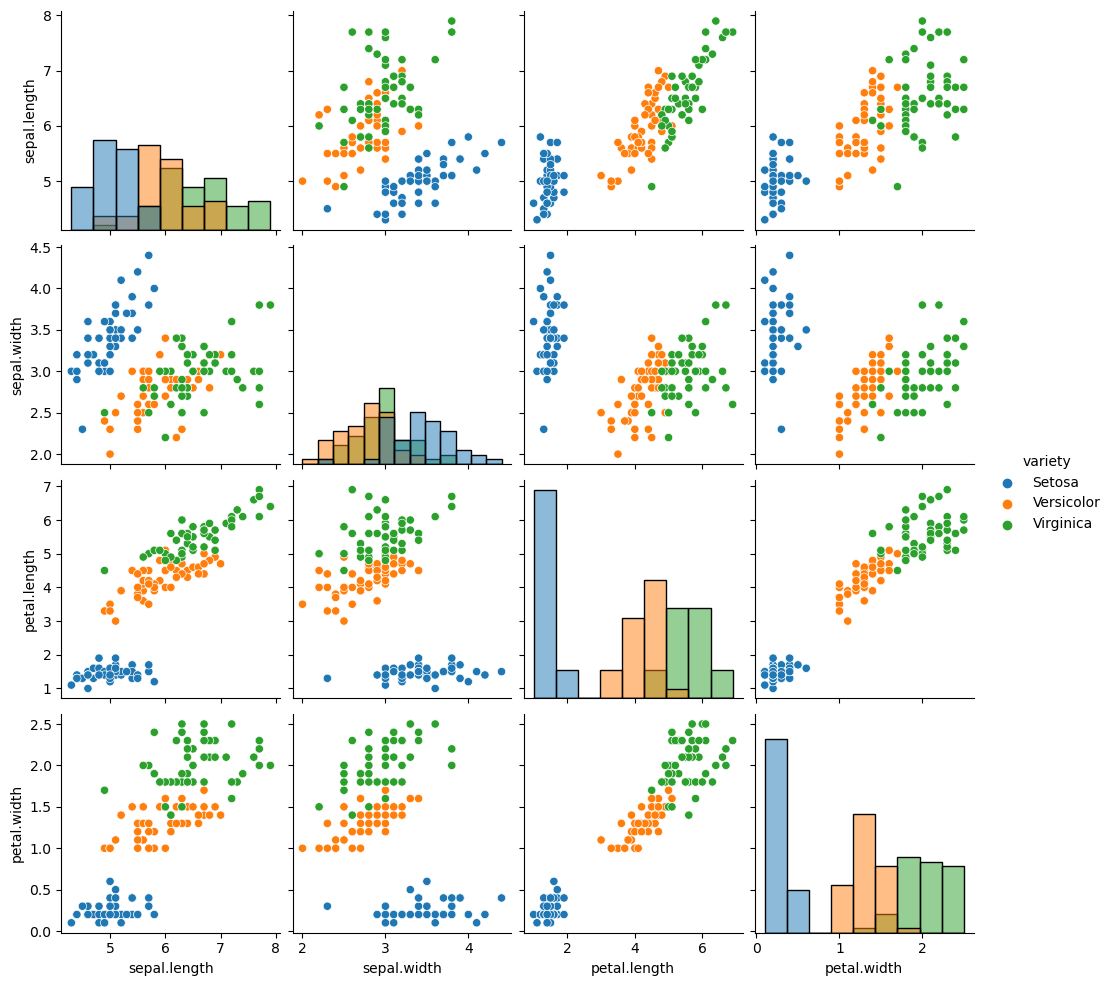

In [33]:
#Visualisation de données
plt.figure(figsize=(8,6))
sns.pairplot(data, hue = 'variety', diag_kind="hist")

In [10]:
#On va appliquer l'algorithme de LR

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=8)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=8)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print('Confusion Matrix :')
print(confusion_matrix(y_test,model.predict(X_test)))
print('\nClassification Report : ')
print(classification_report(y_test, model.predict(X_test), target_names=Label_encoder.classes_))
print('\nAccuracy score : ')
print(accuracy_score(y_test, model.predict(X_test)))

Confusion Matrix :
[[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]

Classification Report : 
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.80      0.89      0.84         9
   Virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Accuracy score : 
0.9


In [35]:
#Testez les données
predicted_data = model.predict(X_test)
predicted_data = Label_encoder.inverse_transform(predicted_data)
print(predicted_data)


['Setosa' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa'
 'Virginica' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Versicolor' 'Versicolor' 'Virginica' 'Virginica' 'Virginica' 'Virginica'
 'Virginica' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor'
 'Setosa' 'Virginica' 'Setosa' 'Setosa' 'Virginica']


In [27]:
#Prediction avec des nouvelles valeurs

new_data = [[5, 3, 1.3, 2.3],[6.7, 3.1, 4.7, 1.5]]

predicted_data = model.predict(new_data)
predicted_data = Label_encoder.inverse_transform(predicted_data)
print(predicted_data)

['Setosa' 'Versicolor']


C:\Users\US4Moooow\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
